Class Distribution After SMOTE:
 fetal_health
2.0    1646
1.0    1646
3.0    1646
Name: count, dtype: int64


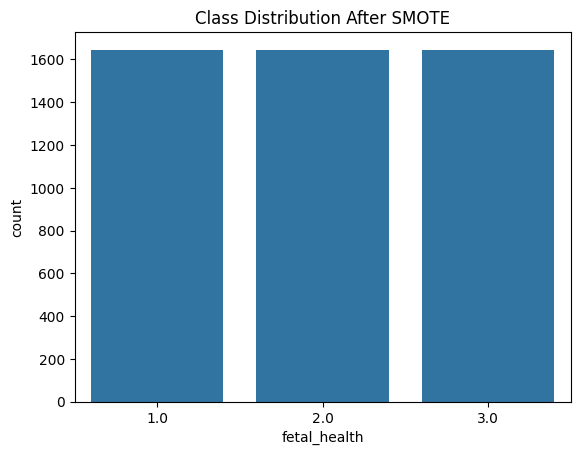

Logistic Regression - Train Accuracy: 88.89%, Test Accuracy: 88.56%

Logistic Regression Classification Report:
               precision    recall  f1-score   support

         1.0       0.96      0.89      0.92       329
         2.0       0.82      0.87      0.84       329
         3.0       0.88      0.90      0.89       330

    accuracy                           0.89       988
   macro avg       0.89      0.89      0.89       988
weighted avg       0.89      0.89      0.89       988



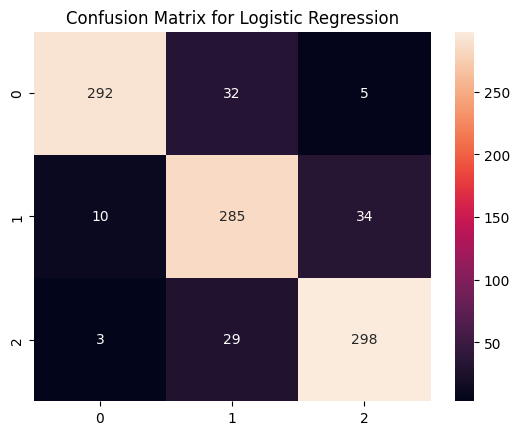

Random Forest - Train Accuracy: 98.68%, Test Accuracy: 97.17%

Random Forest Classification Report:
               precision    recall  f1-score   support

         1.0       0.98      0.95      0.97       329
         2.0       0.95      0.97      0.96       329
         3.0       0.99      0.99      0.99       330

    accuracy                           0.97       988
   macro avg       0.97      0.97      0.97       988
weighted avg       0.97      0.97      0.97       988



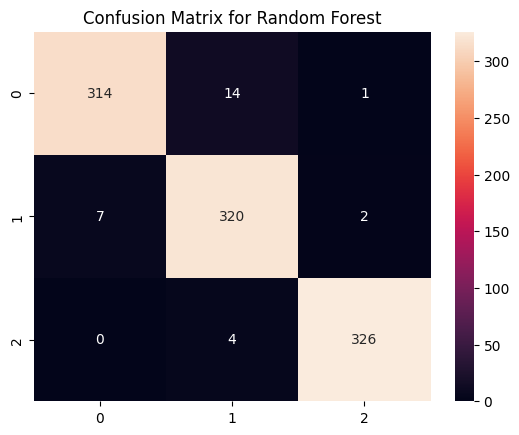

KNN - Train Accuracy: 96.96%, Test Accuracy: 95.14%

KNN Classification Report:
               precision    recall  f1-score   support

         1.0       0.99      0.89      0.93       329
         2.0       0.89      0.98      0.93       329
         3.0       0.98      0.99      0.99       330

    accuracy                           0.95       988
   macro avg       0.95      0.95      0.95       988
weighted avg       0.95      0.95      0.95       988



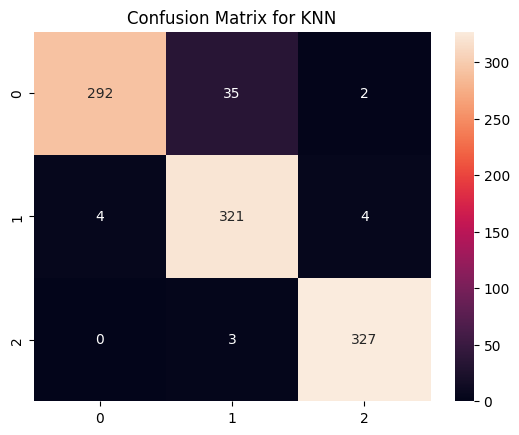

Gradient Boosting - Train Accuracy: 99.52%, Test Accuracy: 97.98%

Gradient Boosting Classification Report:
               precision    recall  f1-score   support

         1.0       0.98      0.98      0.98       329
         2.0       0.97      0.98      0.97       329
         3.0       1.00      0.98      0.99       330

    accuracy                           0.98       988
   macro avg       0.98      0.98      0.98       988
weighted avg       0.98      0.98      0.98       988



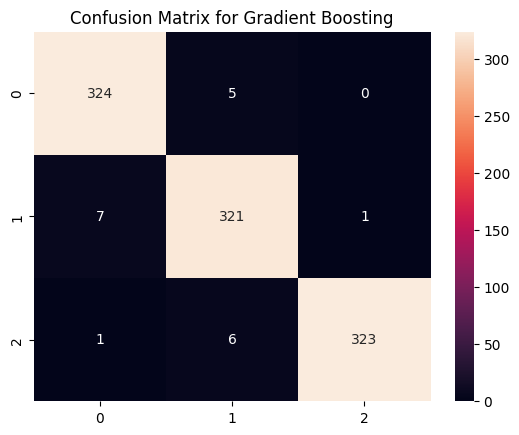


Ensemble Model - Train Accuracy: 98.58%, Test Accuracy: 97.77%

Ensemble Model Report:
               precision    recall  f1-score   support

         1.0       0.99      0.95      0.97       329
         2.0       0.95      0.98      0.97       329
         3.0       1.00      0.99      1.00       330

    accuracy                           0.98       988
   macro avg       0.98      0.98      0.98       988
weighted avg       0.98      0.98      0.98       988


Ensemble Model with Adjusted Weights Report:
               precision    recall  f1-score   support

         1.0       0.99      0.96      0.97       329
         2.0       0.95      0.98      0.97       329
         3.0       1.00      0.99      0.99       330

    accuracy                           0.98       988
   macro avg       0.98      0.98      0.98       988
weighted avg       0.98      0.98      0.98       988

New Data Prediction: class 3.0 , Pathological
New Data Prediction Probabilities: [1.78335844e-04 9.414

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import VotingClassifier

# Load dataset (replace 'fetal_health.csv' with your file)
data = pd.read_csv('fetal_health.csv')

# Remove duplicate rows if any
data = data.drop_duplicates()

# Separate features and target
X = data.drop('fetal_health', axis=1)
y = data['fetal_health']

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# 1. Check for Imbalanced Dataset
print("Class Distribution After SMOTE:\n", y_resampled.value_counts())
sns.countplot(x=y_resampled)
plt.title("Class Distribution After SMOTE")
plt.show()

# 2. Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Model Initialization
logreg = LogisticRegression(max_iter=5000, random_state=42)  # Increased max_iter
rf = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)  # Tuned hyperparameters
knn = KNeighborsClassifier(n_neighbors=5)
gb = GradientBoostingClassifier(n_estimators=150, learning_rate=0.1, random_state=42)  # Tuned hyperparameters

models = {'Logistic Regression': logreg, 'Random Forest': rf, 'KNN': knn, 'Gradient Boosting': gb}

# 4. Model Training and Evaluation
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    train_score = model.score(X_train_scaled, y_train)
    test_score = model.score(X_test_scaled, y_test)
    print(f"{name} - Train Accuracy: {train_score * 100:.2f}%, Test Accuracy: {test_score * 100:.2f}%")
    pred = model.predict(X_test_scaled)
    print(f"\n{name} Classification Report:\n", classification_report(y_test, pred))
    sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='d')
    plt.title(f"Confusion Matrix for {name}")
    plt.show()

# 5. Voting Classifier (Ensemble Model)
ensemble_model = VotingClassifier(estimators=[
    ('logreg', logreg),
    ('rf', rf),
    ('knn', knn),
    ('gb', gb)
], voting='soft')

ensemble_model.fit(X_train_scaled, y_train)
ensemble_pred = ensemble_model.predict(X_test_scaled)

# Accuracy of Ensemble Model
ensemble_train_accuracy = ensemble_model.score(X_train_scaled, y_train)
ensemble_test_accuracy = ensemble_model.score(X_test_scaled, y_test)
print(f"\nEnsemble Model - Train Accuracy: {ensemble_train_accuracy * 100:.2f}%, Test Accuracy: {ensemble_test_accuracy * 100:.2f}%")

print("\nEnsemble Model Report:\n", classification_report(y_test, ensemble_pred))

# 6. Adjust Model Weights
ensemble_weighted_model = VotingClassifier(estimators=[
    ('logreg', logreg),
    ('rf', rf),
    ('knn', knn),
    ('gb', gb)
], voting='soft', weights=[1, 3, 1, 2])

ensemble_weighted_model.fit(X_train_scaled, y_train)
weighted_pred = ensemble_weighted_model.predict(X_test_scaled)

print("\nEnsemble Model with Adjusted Weights Report:\n", classification_report(y_test, weighted_pred))

# Predicting on a new data point (single instance)
# Example new data with one value for each feature
new_data_class_2 = pd.DataFrame({
    'baseline value': [134],  # Higher baseline value, could be indicative of a different class
    'accelerations': [0.001],  # Acceleration might be higher for class 2
    'fetal_movement': [0],  # Slightly more fetal movement
    'uterine_contractions': [0.013],  # Uterine contractions might be more frequent for class 2
    'light_decelerations': [0.008],  # Slightly more decelerations
    'severe_decelerations': [0],  # Mild severe deceleration
    'prolongued_decelerations': [0.003],  # Prolonged decelerations slightly higher
    'abnormal_short_term_variability': [29],  # Short term variability higher
    'mean_value_of_short_term_variability': [6.3],  # Increased mean value
    'percentage_of_time_with_abnormal_long_term_variability': [0],  # More time with abnormal long-term variability
    'mean_value_of_long_term_variability': [0],  # Increased mean value for long-term variability
    'histogram_width': [150],  # Wider histogram could indicate different characteristics
    'histogram_min': [50],
    'histogram_max': [200],  # Higher maximum could indicate a different class
    'histogram_number_of_peaks': [6],  # More peaks in the histogram
    'histogram_number_of_zeroes': [3],  # More zeros might correlate with different patterns
    'histogram_mode': [71],  # Mode might be higher
    'histogram_mean': [107],  # Higher mean value
    'histogram_median': [106],  # Higher median
    'histogram_variance': [215],  # More variance
    'histogram_tendency': [0]  # Slightly more tendency
})

# 8. Scale the new data using the same scaler that was used for the training data
new_data_scaled = scaler.transform(new_data_class_2)

# 9. Use the Ensemble Model to predict the class for the new data
ensemble_predictions = ensemble_model.predict(new_data_scaled)

# Define the mapping for class labels
class_labels = {1: 'Normal', 2: 'Suspect', 3: 'Pathological'}

# Get the class number and its corresponding name
predicted_class = ensemble_predictions[0]
predicted_class_name = class_labels[predicted_class]

# 10. Print the prediction in the desired format
print(f"New Data Prediction: class {predicted_class} , {predicted_class_name}")

# Optionally, print the probabilities if you need more information on the prediction
ensemble_probabilities = ensemble_model.predict_proba(new_data_scaled)
print(f"New Data Prediction Probabilities: {ensemble_probabilities[0]}")


Class Distribution After SMOTE:
 fetal_health
2.0    1646
1.0    1646
3.0    1646
Name: count, dtype: int64


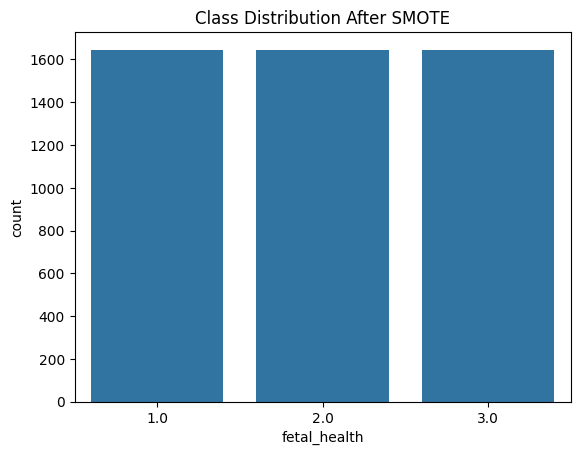

Logistic Regression - Train Accuracy: 88.89%, Test Accuracy: 88.56%

Logistic Regression Classification Report:
               precision    recall  f1-score   support

         1.0       0.96      0.89      0.92       329
         2.0       0.82      0.87      0.84       329
         3.0       0.88      0.90      0.89       330

    accuracy                           0.89       988
   macro avg       0.89      0.89      0.89       988
weighted avg       0.89      0.89      0.89       988



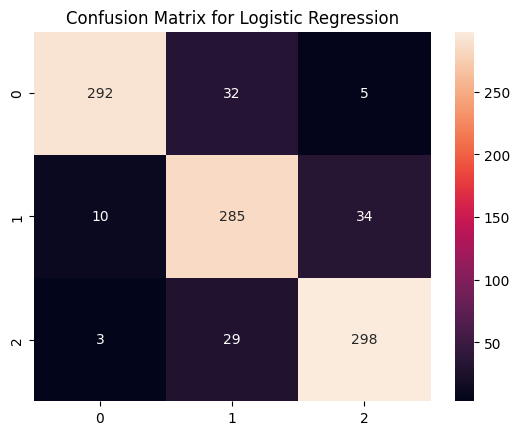

Random Forest - Train Accuracy: 98.68%, Test Accuracy: 97.17%

Random Forest Classification Report:
               precision    recall  f1-score   support

         1.0       0.98      0.95      0.97       329
         2.0       0.95      0.97      0.96       329
         3.0       0.99      0.99      0.99       330

    accuracy                           0.97       988
   macro avg       0.97      0.97      0.97       988
weighted avg       0.97      0.97      0.97       988



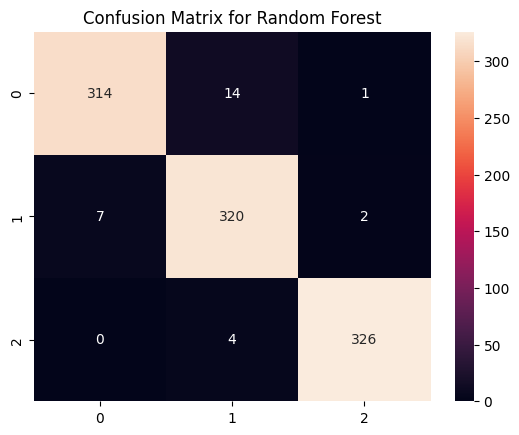

KNN - Train Accuracy: 96.96%, Test Accuracy: 95.14%

KNN Classification Report:
               precision    recall  f1-score   support

         1.0       0.99      0.89      0.93       329
         2.0       0.89      0.98      0.93       329
         3.0       0.98      0.99      0.99       330

    accuracy                           0.95       988
   macro avg       0.95      0.95      0.95       988
weighted avg       0.95      0.95      0.95       988



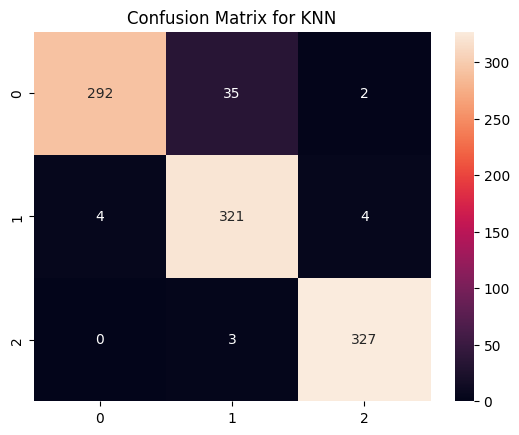

Gradient Boosting - Train Accuracy: 99.52%, Test Accuracy: 97.98%

Gradient Boosting Classification Report:
               precision    recall  f1-score   support

         1.0       0.98      0.98      0.98       329
         2.0       0.97      0.98      0.97       329
         3.0       1.00      0.98      0.99       330

    accuracy                           0.98       988
   macro avg       0.98      0.98      0.98       988
weighted avg       0.98      0.98      0.98       988



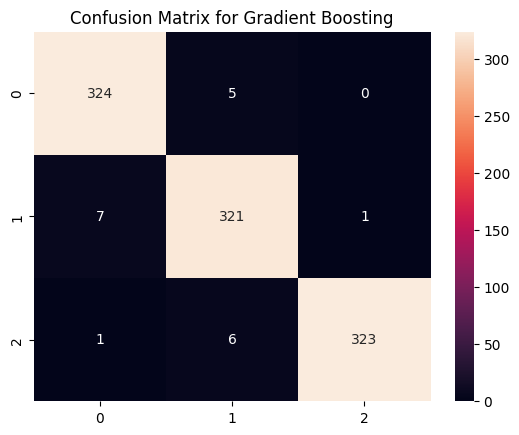


Ensemble Model - Train Accuracy: 98.58%, Test Accuracy: 97.77%

Ensemble Model Report:
               precision    recall  f1-score   support

         1.0       0.99      0.95      0.97       329
         2.0       0.95      0.98      0.97       329
         3.0       1.00      0.99      1.00       330

    accuracy                           0.98       988
   macro avg       0.98      0.98      0.98       988
weighted avg       0.98      0.98      0.98       988


Ensemble Model with Adjusted Weights Report:
               precision    recall  f1-score   support

         1.0       0.99      0.96      0.97       329
         2.0       0.95      0.98      0.97       329
         3.0       1.00      0.99      0.99       330

    accuracy                           0.98       988
   macro avg       0.98      0.98      0.98       988
weighted avg       0.98      0.98      0.98       988

New Data Prediction: class 2.0 , Suspect
New Data Prediction Probabilities: [0.01482885 0.91816231 0.0

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import VotingClassifier

# Load dataset (replace 'fetal_health.csv' with your file)
data = pd.read_csv('fetal_health.csv')

# Remove duplicate rows if any
data = data.drop_duplicates()

# Separate features and target
X = data.drop('fetal_health', axis=1)
y = data['fetal_health']

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# 1. Check for Imbalanced Dataset
print("Class Distribution After SMOTE:\n", y_resampled.value_counts())
sns.countplot(x=y_resampled)
plt.title("Class Distribution After SMOTE")
plt.show()

# 2. Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Model Initialization
logreg = LogisticRegression(max_iter=5000, random_state=42)  # Increased max_iter
rf = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)  # Tuned hyperparameters
knn = KNeighborsClassifier(n_neighbors=5)
gb = GradientBoostingClassifier(n_estimators=150, learning_rate=0.1, random_state=42)  # Tuned hyperparameters

models = {'Logistic Regression': logreg, 'Random Forest': rf, 'KNN': knn, 'Gradient Boosting': gb}

# 4. Model Training and Evaluation
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    train_score = model.score(X_train_scaled, y_train)
    test_score = model.score(X_test_scaled, y_test)
    print(f"{name} - Train Accuracy: {train_score * 100:.2f}%, Test Accuracy: {test_score * 100:.2f}%")
    pred = model.predict(X_test_scaled)
    print(f"\n{name} Classification Report:\n", classification_report(y_test, pred))
    sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='d')
    plt.title(f"Confusion Matrix for {name}")
    plt.show()

# 5. Voting Classifier (Ensemble Model)
ensemble_model = VotingClassifier(estimators=[
    ('logreg', logreg),
    ('rf', rf),
    ('knn', knn),
    ('gb', gb)
], voting='soft')

ensemble_model.fit(X_train_scaled, y_train)
ensemble_pred = ensemble_model.predict(X_test_scaled)

# Accuracy of Ensemble Model
ensemble_train_accuracy = ensemble_model.score(X_train_scaled, y_train)
ensemble_test_accuracy = ensemble_model.score(X_test_scaled, y_test)
print(f"\nEnsemble Model - Train Accuracy: {ensemble_train_accuracy * 100:.2f}%, Test Accuracy: {ensemble_test_accuracy * 100:.2f}%")

print("\nEnsemble Model Report:\n", classification_report(y_test, ensemble_pred))

# 6. Adjust Model Weights
ensemble_weighted_model = VotingClassifier(estimators=[
    ('logreg', logreg),
    ('rf', rf),
    ('knn', knn),
    ('gb', gb)
], voting='soft', weights=[1, 3, 1, 2])

ensemble_weighted_model.fit(X_train_scaled, y_train)
weighted_pred = ensemble_weighted_model.predict(X_test_scaled)

print("\nEnsemble Model with Adjusted Weights Report:\n", classification_report(y_test, weighted_pred))

# Predicting on a new data point (single instance)
# Example new data with one value for each feature
new_data_class_2 = pd.DataFrame({
    'baseline value': [120],  # Higher baseline value, could be indicative of a different class
    'accelerations': [0],  # Acceleration might be higher for class 2
    'fetal_movement': [0],  # Slightly more fetal movement
    'uterine_contractions': [0],  # Uterine contractions might be more frequent for class 2
    'light_decelerations': [0],  # Slightly more decelerations
    'severe_decelerations': [0],  # Mild severe deceleration
    'prolongued_decelerations': [0],  # Prolonged decelerations slightly higher
    'abnormal_short_term_variability': [73],  # Short term variability higher
    'mean_value_of_short_term_variability': [0.5],  # Increased mean value
    'percentage_of_time_with_abnormal_long_term_variability': [43],  # More time with abnormal long-term variability
    'mean_value_of_long_term_variability': [2.4],  # Increased mean value for long-term variability
    'histogram_width': [64],  # Wider histogram could indicate different characteristics
    'histogram_min': [62],
    'histogram_max': [126],  # Higher maximum could indicate a different class
    'histogram_number_of_peaks': [2],  # More peaks in the histogram
    'histogram_number_of_zeroes': [0],  # More zeros might correlate with different patterns
    'histogram_mode': [120],  # Mode might be higher
    'histogram_mean': [137],  # Higher mean value
    'histogram_median': [121],  # Higher median
    'histogram_variance': [73],  # More variance
    'histogram_tendency': [1]  # Slightly more tendency
})

# 8. Scale the new data using the same scaler that was used for the training data
new_data_scaled = scaler.transform(new_data_class_2)

# 9. Use the Ensemble Model to predict the class for the new data
ensemble_predictions = ensemble_model.predict(new_data_scaled)

# Define the mapping for class labels
class_labels = {1: 'Normal', 2: 'Suspect', 3: 'Pathological'}

# Get the class number and its corresponding name
predicted_class = ensemble_predictions[0]
predicted_class_name = class_labels[predicted_class]

# 10. Print the prediction in the desired format
print(f"New Data Prediction: class {predicted_class} , {predicted_class_name}")

# Optionally, print the probabilities if you need more information on the prediction
ensemble_probabilities = ensemble_model.predict_proba(new_data_scaled)
print(f"New Data Prediction Probabilities: {ensemble_probabilities[0]}")


Class Distribution After SMOTE:
 fetal_health
2.0    1646
1.0    1646
3.0    1646
Name: count, dtype: int64


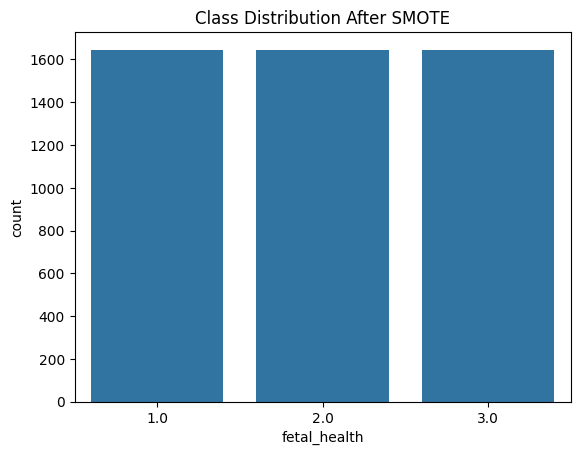

Logistic Regression - Train Accuracy: 88.89%, Test Accuracy: 88.56%

Logistic Regression Classification Report:
               precision    recall  f1-score   support

         1.0       0.96      0.89      0.92       329
         2.0       0.82      0.87      0.84       329
         3.0       0.88      0.90      0.89       330

    accuracy                           0.89       988
   macro avg       0.89      0.89      0.89       988
weighted avg       0.89      0.89      0.89       988



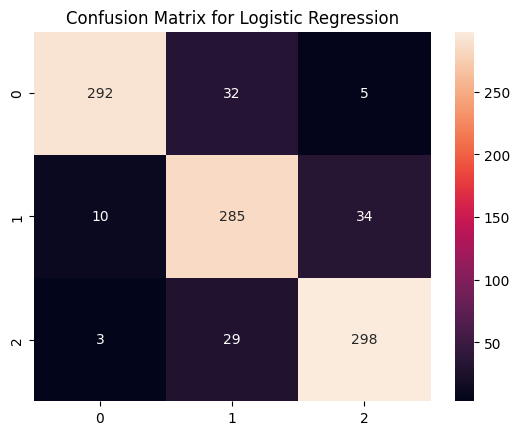

Random Forest - Train Accuracy: 98.68%, Test Accuracy: 97.17%

Random Forest Classification Report:
               precision    recall  f1-score   support

         1.0       0.98      0.95      0.97       329
         2.0       0.95      0.97      0.96       329
         3.0       0.99      0.99      0.99       330

    accuracy                           0.97       988
   macro avg       0.97      0.97      0.97       988
weighted avg       0.97      0.97      0.97       988



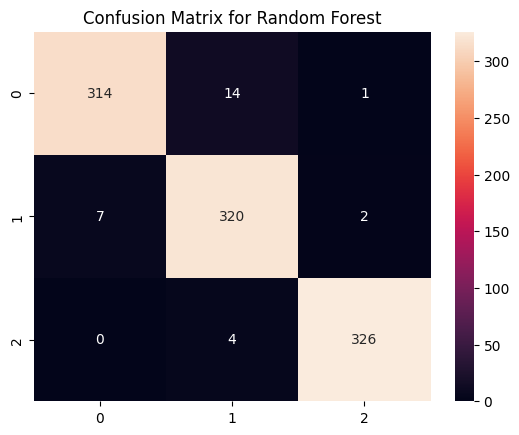

KNN - Train Accuracy: 96.96%, Test Accuracy: 95.14%

KNN Classification Report:
               precision    recall  f1-score   support

         1.0       0.99      0.89      0.93       329
         2.0       0.89      0.98      0.93       329
         3.0       0.98      0.99      0.99       330

    accuracy                           0.95       988
   macro avg       0.95      0.95      0.95       988
weighted avg       0.95      0.95      0.95       988



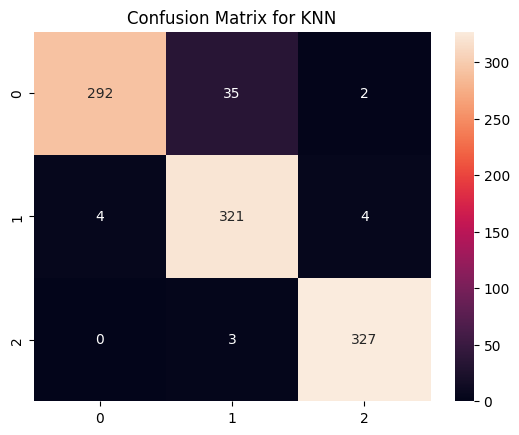

Gradient Boosting - Train Accuracy: 99.52%, Test Accuracy: 97.98%

Gradient Boosting Classification Report:
               precision    recall  f1-score   support

         1.0       0.98      0.98      0.98       329
         2.0       0.97      0.98      0.97       329
         3.0       1.00      0.98      0.99       330

    accuracy                           0.98       988
   macro avg       0.98      0.98      0.98       988
weighted avg       0.98      0.98      0.98       988



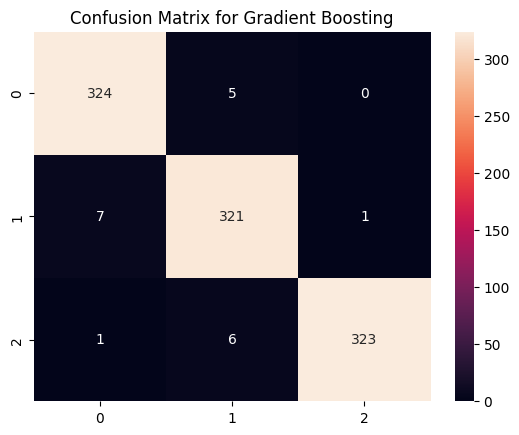


Ensemble Model - Train Accuracy: 98.58%, Test Accuracy: 97.77%

Ensemble Model Report:
               precision    recall  f1-score   support

         1.0       0.99      0.95      0.97       329
         2.0       0.95      0.98      0.97       329
         3.0       1.00      0.99      1.00       330

    accuracy                           0.98       988
   macro avg       0.98      0.98      0.98       988
weighted avg       0.98      0.98      0.98       988


Ensemble Model with Adjusted Weights Report:
               precision    recall  f1-score   support

         1.0       0.99      0.96      0.97       329
         2.0       0.95      0.98      0.97       329
         3.0       1.00      0.99      0.99       330

    accuracy                           0.98       988
   macro avg       0.98      0.98      0.98       988
weighted avg       0.98      0.98      0.98       988

New Data Prediction: class 1.0 , Normal
New Data Prediction Probabilities: [9.92981739e-01 6.80553197e

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import VotingClassifier

# Load dataset (replace 'fetal_health.csv' with your file)
data = pd.read_csv('fetal_health.csv')

# Remove duplicate rows if any
data = data.drop_duplicates()

# Separate features and target
X = data.drop('fetal_health', axis=1)
y = data['fetal_health']

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# 1. Check for Imbalanced Dataset
print("Class Distribution After SMOTE:\n", y_resampled.value_counts())
sns.countplot(x=y_resampled)
plt.title("Class Distribution After SMOTE")
plt.show()

# 2. Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Model Initialization
logreg = LogisticRegression(max_iter=5000, random_state=42)  # Increased max_iter
rf = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)  # Tuned hyperparameters
knn = KNeighborsClassifier(n_neighbors=5)
gb = GradientBoostingClassifier(n_estimators=150, learning_rate=0.1, random_state=42)  # Tuned hyperparameters

models = {'Logistic Regression': logreg, 'Random Forest': rf, 'KNN': knn, 'Gradient Boosting': gb}

# 4. Model Training and Evaluation
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    train_score = model.score(X_train_scaled, y_train)
    test_score = model.score(X_test_scaled, y_test)
    print(f"{name} - Train Accuracy: {train_score * 100:.2f}%, Test Accuracy: {test_score * 100:.2f}%")
    pred = model.predict(X_test_scaled)
    print(f"\n{name} Classification Report:\n", classification_report(y_test, pred))
    sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='d')
    plt.title(f"Confusion Matrix for {name}")
    plt.show()

# 5. Voting Classifier (Ensemble Model)
ensemble_model = VotingClassifier(estimators=[
    ('logreg', logreg),
    ('rf', rf),
    ('knn', knn),
    ('gb', gb)
], voting='soft')

ensemble_model.fit(X_train_scaled, y_train)
ensemble_pred = ensemble_model.predict(X_test_scaled)

# Accuracy of Ensemble Model
ensemble_train_accuracy = ensemble_model.score(X_train_scaled, y_train)
ensemble_test_accuracy = ensemble_model.score(X_test_scaled, y_test)
print(f"\nEnsemble Model - Train Accuracy: {ensemble_train_accuracy * 100:.2f}%, Test Accuracy: {ensemble_test_accuracy * 100:.2f}%")

print("\nEnsemble Model Report:\n", classification_report(y_test, ensemble_pred))

# 6. Adjust Model Weights
ensemble_weighted_model = VotingClassifier(estimators=[
    ('logreg', logreg),
    ('rf', rf),
    ('knn', knn),
    ('gb', gb)
], voting='soft', weights=[1, 3, 1, 2])

ensemble_weighted_model.fit(X_train_scaled, y_train)
weighted_pred = ensemble_weighted_model.predict(X_test_scaled)

print("\nEnsemble Model with Adjusted Weights Report:\n", classification_report(y_test, weighted_pred))

# Predicting on a new data point (single instance)
# Example new data with one value for each feature
new_data_class_2 = pd.DataFrame({
    'baseline value': [133],  # Higher baseline value, could be indicative of a different class
    'accelerations': [0.003],  # Acceleration might be higher for class 2
    'fetal_movement': [0],  # Slightly more fetal movement
    'uterine_contractions': [0.008],  # Uterine contractions might be more frequent for class 2
    'light_decelerations': [0.003],  # Slightly more decelerations
    'severe_decelerations': [0],  # Mild severe deceleration
    'prolongued_decelerations': [0],  # Prolonged decelerations slightly higher
    'abnormal_short_term_variability': [16],  # Short term variability higher
    'mean_value_of_short_term_variability': [2.1],  # Increased mean value
    'percentage_of_time_with_abnormal_long_term_variability': [0],  # More time with abnormal long-term variability
    'mean_value_of_long_term_variability': [13.4],  # Increased mean value for long-term variability
    'histogram_width': [130],  # Wider histogram could indicate different characteristics
    'histogram_min': [68],
    'histogram_max': [198],  # Higher maximum could indicate a different class
    'histogram_number_of_peaks': [5],  # More peaks in the histogram
    'histogram_number_of_zeroes': [1],  # More zeros might correlate with different patterns
    'histogram_mode': [141],  # Mode might be higher
    'histogram_mean': [135],  # Higher mean value
    'histogram_median': [138],  # Higher median
    'histogram_variance': [13],  # More variance
    'histogram_tendency': [0]  # Slightly more tendency
})

# 8. Scale the new data using the same scaler that was used for the training data
new_data_scaled = scaler.transform(new_data_class_2)

# 9. Use the Ensemble Model to predict the class for the new data
ensemble_predictions = ensemble_model.predict(new_data_scaled)

# Define the mapping for class labels
class_labels = {1: 'Normal', 2: 'Suspect', 3: 'Pathological'}

# Get the class number and its corresponding name
predicted_class = ensemble_predictions[0]
predicted_class_name = class_labels[predicted_class]

# 10. Print the prediction in the desired format
print(f"New Data Prediction: class {predicted_class} , {predicted_class_name}")

# Optionally, print the probabilities if you need more information on the prediction
ensemble_probabilities = ensemble_model.predict_proba(new_data_scaled)
print(f"New Data Prediction Probabilities: {ensemble_probabilities[0]}")
